<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Joy Division Plot</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 8c8cad2fbde27aba0d3b05964d7ce781c3b552ab

numpy     : 1.19.2
watermark : 2.1.0
pandas    : 1.1.3
matplotlib: 3.3.2
json      : 2.0.9



Load default figure style

# Load the data

We can download the data from this URL. See https://www.mathworks.com/matlabcentral/fileexchange/75147-joyplot-ridgeline-data-representation

In [3]:
url="https://gist.githubusercontent.com/borgar/31c1e476b8e92a11d7e9/raw/0fae97dab6830ecee185a63c1cee0008f6778ff6/pulsar.csv"

This is a simple csv file that we can read using numpy

In [4]:
data = np.loadtxt(url, delimiter=',')

In total we have 80 curves with 300 points each

In [5]:
data.shape

(80, 300)

And a quick visualization

In [6]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.81,-0.91,-1.09,-1.00,-0.59,-0.82,-0.43,-0.68,-0.71,-0.27,...,-0.08,0.19,-0.19,-0.18,-0.20,-0.26,-0.52,-0.44,-0.58,-0.54
1,-0.61,-0.40,-0.42,-0.38,-0.55,-0.51,-0.71,-0.79,-0.52,-0.40,...,-0.34,-0.58,-0.26,-0.64,-1.05,-0.83,-0.80,-0.47,-0.13,-0.12
2,-1.43,-1.15,-1.25,-1.13,-0.76,-0.25,0.40,0.26,0.30,0.36,...,-0.29,0.16,0.83,0.99,1.28,0.11,-0.77,-0.88,-0.45,-1.01
3,-1.09,-0.85,-0.72,-0.74,-0.26,-0.04,-0.19,0.18,0.03,0.19,...,0.48,0.52,-0.14,-1.13,-1.07,-1.03,-0.78,-0.40,0.18,0.27
4,-1.13,-0.98,-0.93,-0.90,-1.14,-1.00,-0.90,-1.18,-1.30,-1.07,...,-0.27,-0.47,-0.49,-0.23,-0.75,-0.29,-0.54,-0.65,-0.64,-0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.62,0.64,0.59,0.30,0.01,0.05,-0.63,0.07,0.36,0.78,...,0.20,0.22,0.23,0.27,-0.10,-0.21,-0.09,-0.24,-0.17,-0.62
76,0.32,0.31,0.28,0.42,-0.24,-0.48,-0.73,-0.64,0.04,0.02,...,-0.44,-0.53,-0.50,-0.49,-0.63,-0.56,-0.50,-0.38,-0.58,-0.43
77,-0.09,-0.14,-0.24,-0.24,-0.66,0.00,0.29,0.29,0.60,0.86,...,0.08,-0.88,-1.17,-0.36,-0.31,-0.12,0.29,-0.02,0.21,0.44
78,0.11,0.05,0.05,-0.05,-0.03,-0.29,-0.08,-0.54,-0.01,0.01,...,-0.73,-0.54,-0.53,-0.92,-0.68,-0.87,-1.31,-1.02,-1.10,-1.62


A bit of a hairball if we plot it naively

<AxesSubplot:>

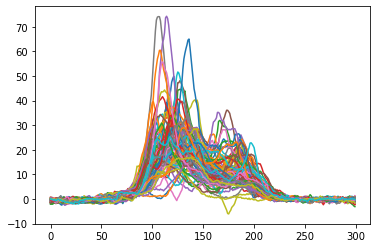

In [7]:
df.T.plot(legend=None)

The trick is to simply shift the curves along the y-axis to avoid overlaps. To be faithful to the original, we also use white lines on a black background

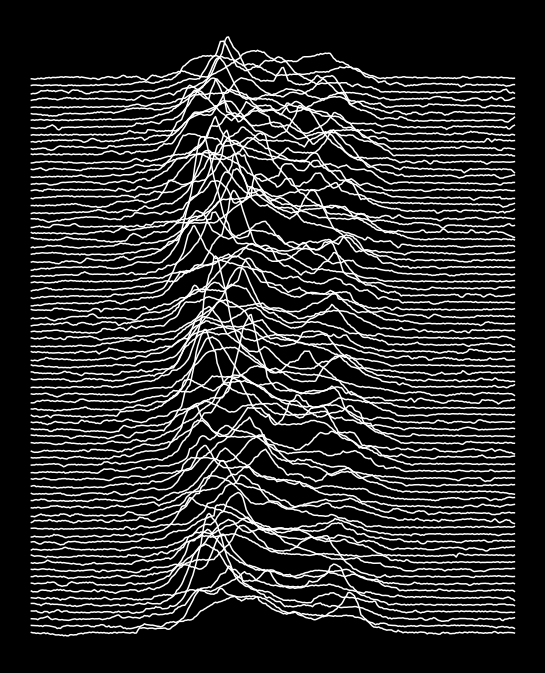

In [8]:
# Initialize figure to some reasonable sie
fig, ax = plt.subplots(1, figsize=(7.68, 9.45))

# Compute the x and y coordinates to use as references for each curve 
x = np.arange(0, data.shape[1])
y = np.arange(data.shape[1])[::-1]*4 # We're separating each curve by 4 units

# Make sure the background is black
fig.set_facecolor('black') 
ax.set_facecolor('black') 

# Plot each curve, one at a time
for i in range(data.shape[0]):
    ax.plot(x, y[i]+data[i], y[i], color='white')

# Remove axis decorations
ax.axis('off')

# Remove extraneous white space
fig.tight_layout()

This is still a bit of a mess because all the lines are still overlapping. We can avoid this by filling in the area below each line using fill_between

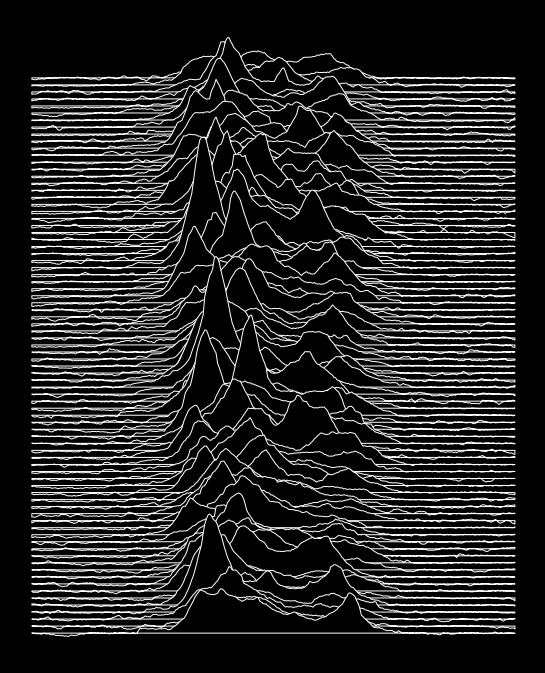

In [9]:
# Initialize figure to some reasonable sie
fig, ax = plt.subplots(1, figsize=(7.68, 9.45))

# Compute the x and y coordinates to use as references for each curve 
x = np.arange(0, data.shape[1])
y = np.arange(data.shape[1])[::-1]*4 # We're separating each curve by 4 units

# Make sure the background is black
fig.set_facecolor('black') 
ax.set_facecolor('black') 

# Plot each curve, one at a time
for i in range(data.shape[0]):
    # Use fill_between to generate a filled shape
    ax.fill_between(x, y[i]+data[i], y[i], 
    # Facecolor is black and the edge (line) white
                    facecolor='black', edgecolor='white')

# Remove axis decorations
ax.axis('off')

# Remove extraneous white space
fig.tight_layout()

This is much closer to our intended goal, but the horizontal lines are a big let down. Perhaps if we combine the filled areas with individual lines?

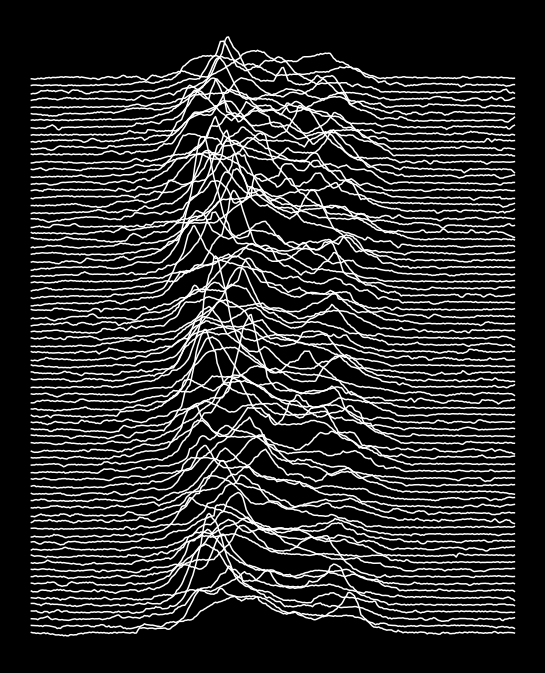

In [10]:
# Initialize figure to some reasonable sie
fig, ax = plt.subplots(1, figsize=(7.68, 9.45))

# Compute the x and y coordinates to use as references for each curve 
x = np.arange(0, data.shape[1])
y = np.arange(data.shape[1])[::-1]*4 # We're separating each curve by 4 units

# Make sure the background is black
fig.set_facecolor('black') 
ax.set_facecolor('black') 

# Plot each curve, one at a time
for i in range(data.shape[0]):
    # Use fill_between to generate a filled shape
    ax.fill_between(x, y[i]+data[i], y[i],
    # Facecolor is still black
                    facecolor='black')
    
    # Manually add the edge only on the top of the shape
    ax.plot(x,         y[i]+data[i], color='white')

# Remove axis decorations
ax.axis('off')

# Remove extraneous white space
fig.tight_layout()

Some we're right back where we started. The trick is to use zorder to make sure that shapes and the corresponding lines are plotted at the same time

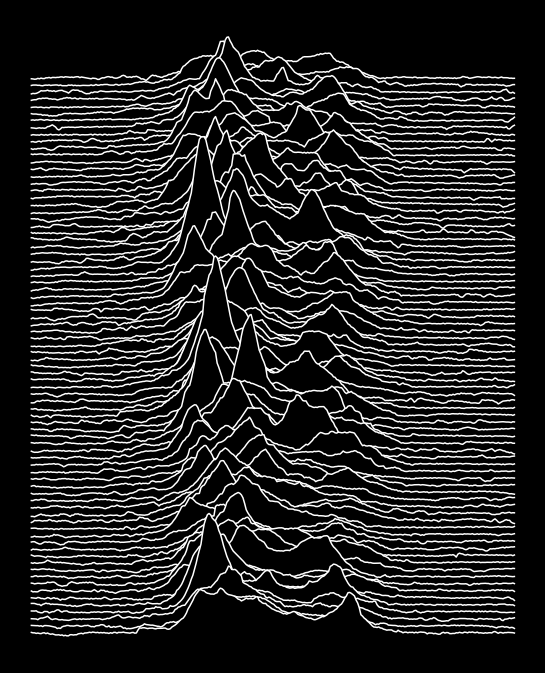

In [11]:
# Initialize figure to some reasonable sie
fig, ax = plt.subplots(1, figsize=(7.68, 9.45))

# Compute the x and y coordinates to use as references for each curve 
x = np.arange(0, data.shape[1])
y = np.arange(data.shape[1])[::-1]*4 # We're separating each curve by 4 units

# Make sure the background is black
fig.set_facecolor('black') 
ax.set_facecolor('black') 

# Plot each curve, one at a time
for i in range(data.shape[0]):
    # Use fill_between to generate a filled shape
    ax.fill_between(x, y[i]+data[i], y[i], 
    # Facecolor is still black and fix the plotting order
                    facecolor='black', zorder=i)
    
    # Manually add the edge only on the top of the shape
    ax.plot(x,         y[i]+data[i], 
    # With the same plotting order
                    color='white', zorder=i)

# Remove axis decorations
ax.axis('off')

# Remove extraneous white space
fig.tight_layout()

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_full.png" style="width: 300px; float: center;" alt="Data For Science, Inc" border="0"> 
</div>